In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(Ipaper))

In [2]:
obj.atac <- readRDS("../data/VisiumHeart/snATAC.annotated.Rds")
obj.atac

An object of class Seurat 
521942 features across 46086 samples within 1 assay 
Active assay: peaks (521942 features, 0 variable features)
 5 dimensional reductions calculated: scopen, umap, harmony, umap_harmony, umap_harmony_v2

In [6]:
df_metadata <- as.data.frame(obj.atac@meta.data)
length(unique(df_metadata$Sample))

[1] 35

In [36]:
df <- read.csv("../../../Annotations_figures/atac_patient_anns_revisions.csv")
head(df)

saveRDS(df, "../../../Annotations_figures/atac_patient_anns_revisions.rds")

,sample_id,condition,region,patient_group,global_ID,rep,patient,region_novel,patient_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,CK166,not_defined,RZ,group_1,AKK006 II healthy,1,P1,control,control_P1
2,CK170,not_defined,CZ,group_3,AKK004 2 w/o,1,P4,FZ/GT,FZ/GT_P4
3,CK174,not_defined,IZ,group_2,AKK003 No9 II,1,P2,IZ/BZ,IZ/BZ_P2
4,CK171,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
5,CK169,not_defined,IZ,group_2,AKK002 infarct,1,P3,IZ,IZ_P3
6,CK168,not_defined,BZ,group_1,AKK002 borderzone,1,P3,RZ/BZ,RZ/BZ_P3


In [14]:
## add sample annotation
condition <- df$condition
names(condition) <- df$sample_id
obj.atac$condition <- stringr::str_replace_all(obj.atac$Sample,
                                                condition)

In [15]:
## add region
region <- df$region
names(region) <- df$sample_id
obj.atac$region <- stringr::str_replace_all(obj.atac$Sample,
                                                region)

In [16]:
## add patient_group
patient_group <- df$patient_group
names(patient_group) <- df$sample_id
obj.atac$patient_group <- stringr::str_replace_all(obj.atac$Sample,
                                                patient_group)

In [17]:
## add global_id
global_id <- df$global_ID
names(global_id) <- df$sample_id
obj.atac$global_id <- stringr::str_replace_all(obj.atac$Sample,
                                                global_id)

In [20]:
## add rep
rep <- as.character(df$rep)
names(rep) <- df$sample_id
obj.atac$rep <- stringr::str_replace_all(obj.atac$Sample,
                                                rep)

In [21]:
## add patient
patient <- df$patient
names(patient) <- df$sample_id
obj.atac$patient <- stringr::str_replace_all(obj.atac$Sample,
                                                patient)

## add patient
region_novel <- df$region_novel
names(region_novel) <- df$sample_id
obj.atac$region_novel <- stringr::str_replace_all(obj.atac$Sample,
                                                region_novel)

## add patient
patient_id <- df$patient_id
names(patient_id) <- df$sample_id
obj.atac$patient_id <- stringr::str_replace_all(obj.atac$Sample,
                                                patient_id)

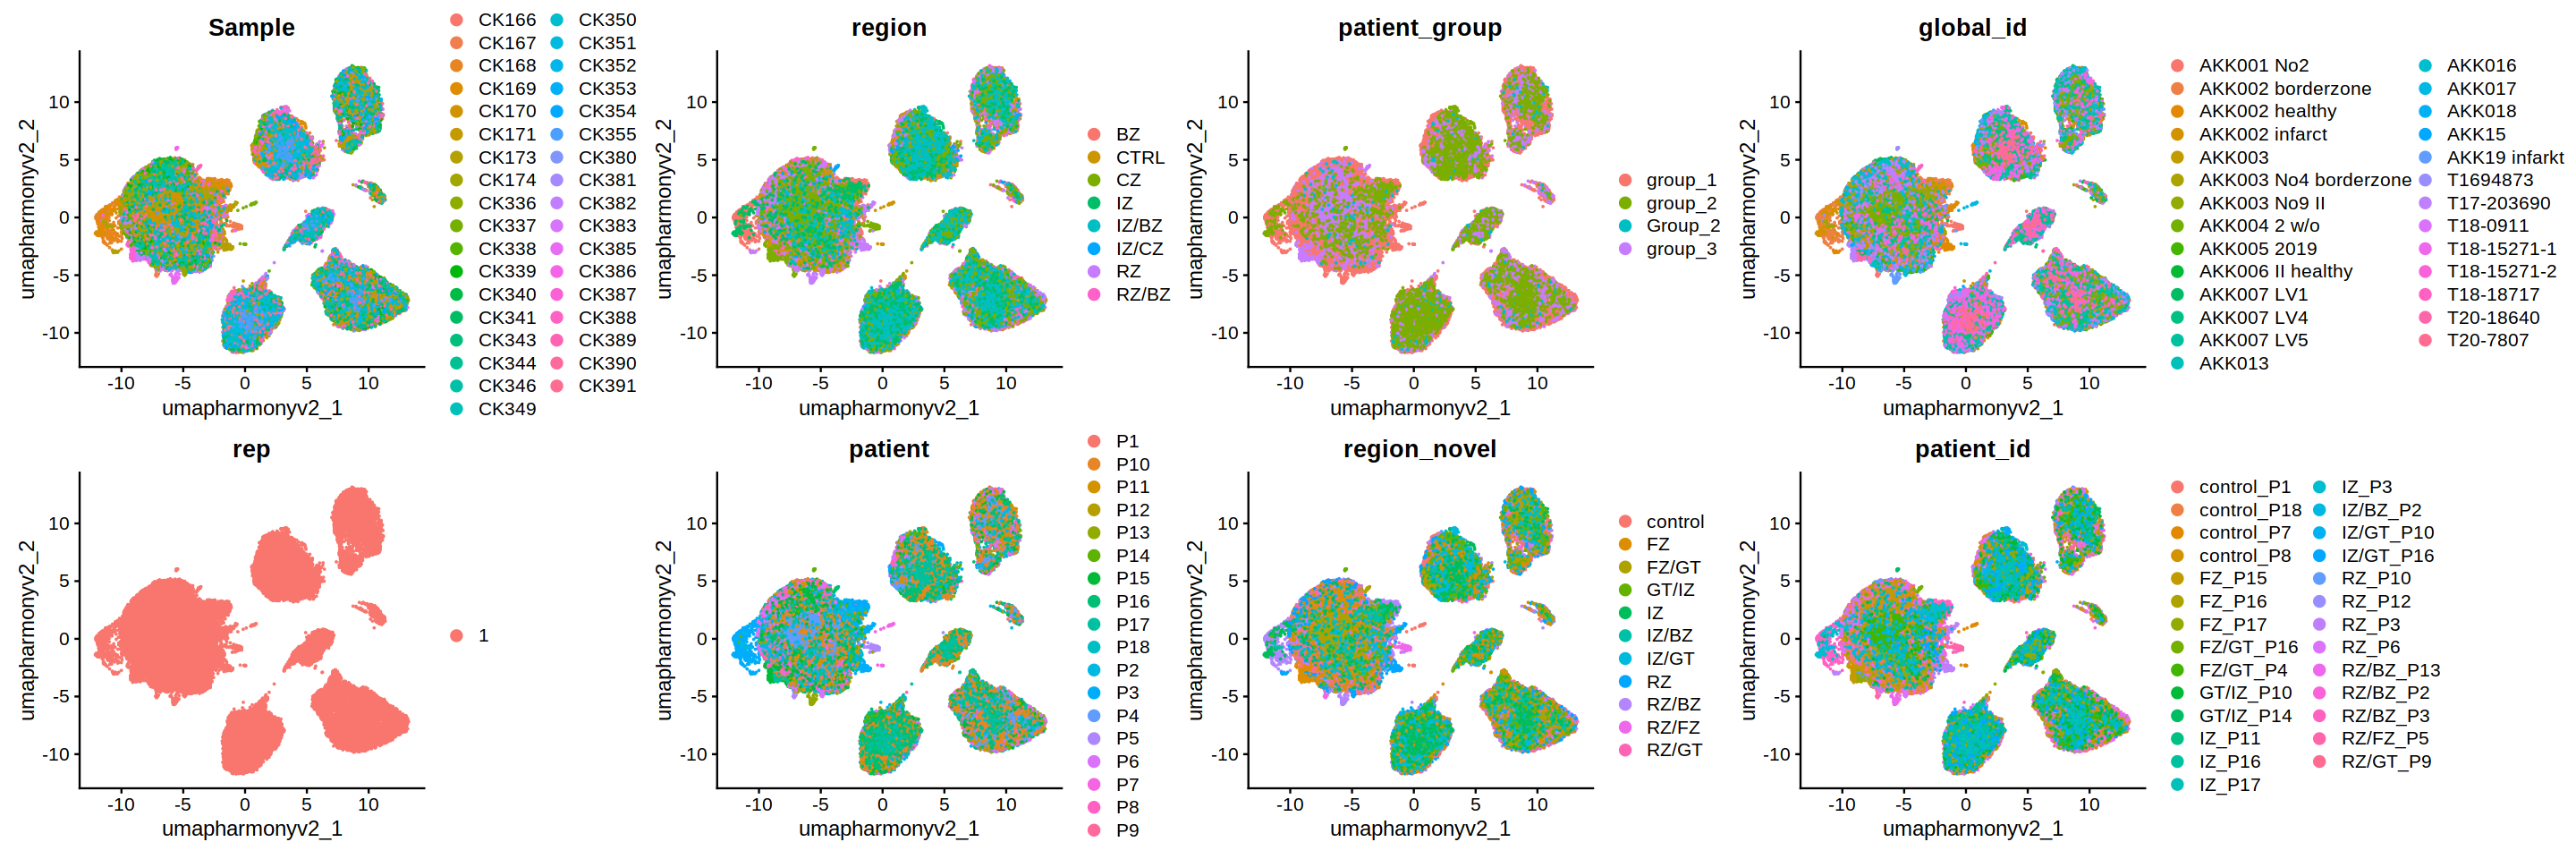

In [30]:
options(repr.plot.height = 8, repr.plot.width = 24)

plot_list <- lapply(c("Sample", "region", "patient_group", "global_id", "rep", "patient", "region_novel", "patient_id"), function(x){
    p <- DimPlot(obj.atac, reduction = "umap_harmony_v2", 
        label = FALSE, pt.size = 0.01, group.by = x)
    
    return(p)
})

p <- patchwork::wrap_plots(plot_list, ncol = 4)

p

In [32]:
df <- as.data.frame(obj.atac@meta.data)

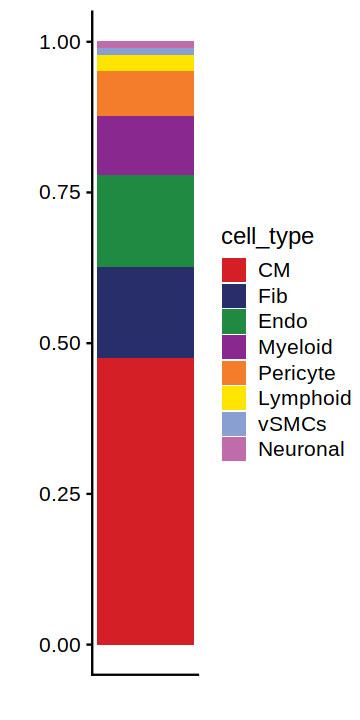

In [33]:
df_ct <- df %>%
    group_by(cell_type) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

cols <- ArchR::paletteDiscrete(df_ct$cell_type)

p <- ggplot(df_ct, aes(1, cell_proportion, fill=cell_type)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())
    

options(repr.plot.width = 3, repr.plot.height = 6)

p

write.table(df_ct, "../data/VisiumHeart/cell_type_proportion.txt",
           sep = "\t", quote = FALSE, row.names = FALSE)

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



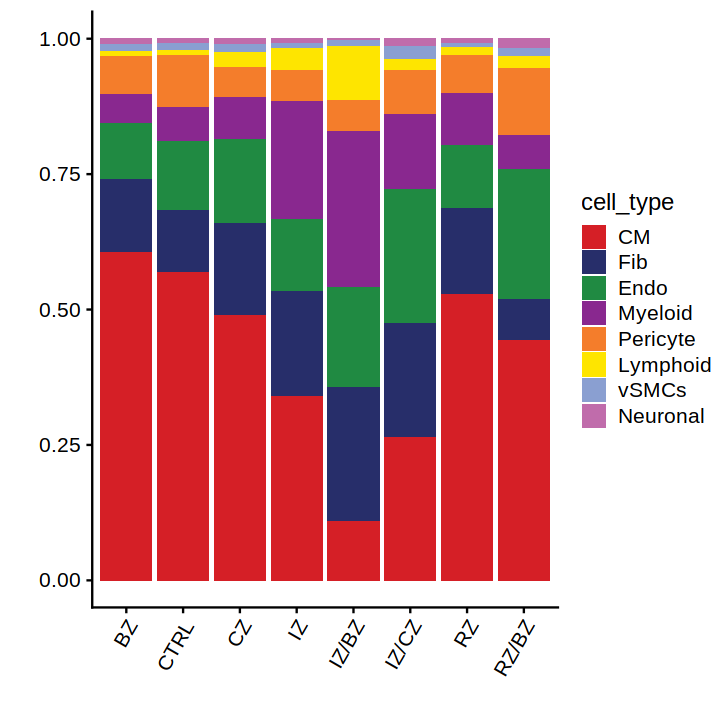

In [34]:
df_ct <- df %>%
    group_by(region, cell_type) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

cols <- ArchR::paletteDiscrete(df_ct$cell_type)

p <- ggplot(df_ct, aes(region, cell_proportion, fill=cell_type)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))
    

options(repr.plot.width = 6, repr.plot.height = 6)

p

`summarise()` has grouped output by 'patient_id'. You can override using the `.groups` argument.



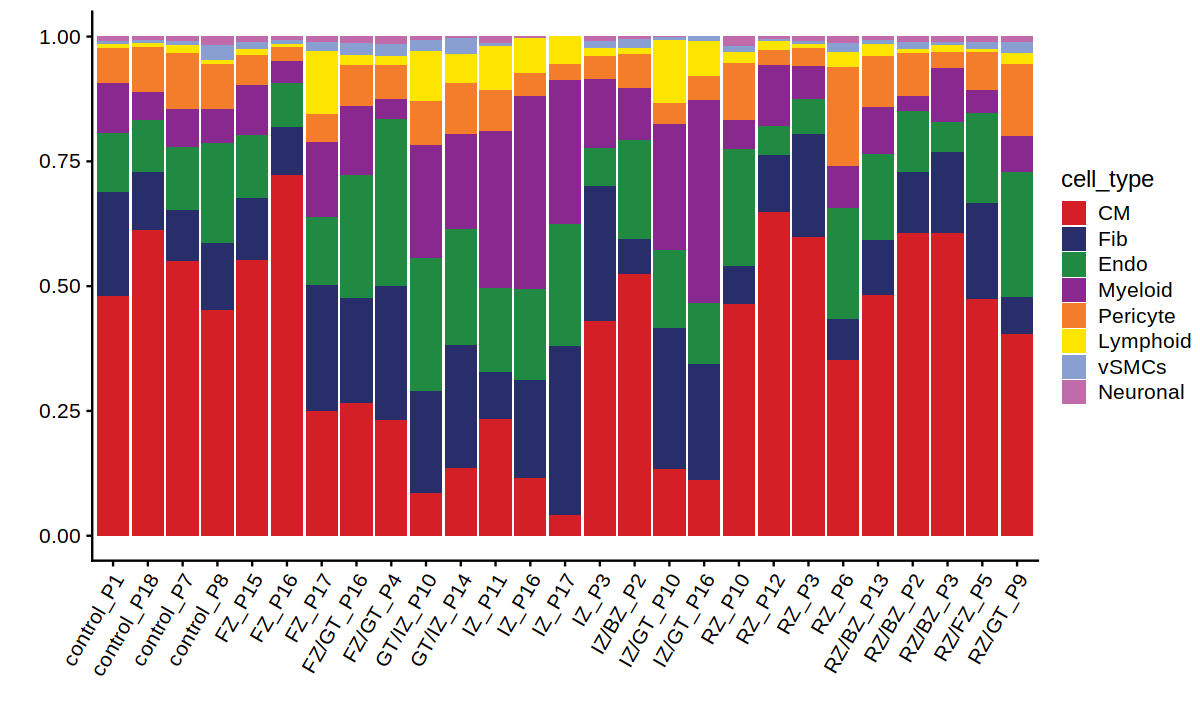

In [35]:
df_ct <- df %>%
    group_by(patient_id, cell_type) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

cols <- ArchR::paletteDiscrete(df_ct$cell_type)

p <- ggplot(df_ct, aes(patient_id, cell_proportion, fill=cell_type)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))
    

options(repr.plot.width = 10, repr.plot.height = 6)

p

In [ ]:
## Save data
saveRDS(obj.atac, "../data/VisiumHeart/snATAC.annotated.Rds")

write.csv(df, "../data/VisiumHeart/metadata.csv")

In [ ]:
## Session information
sessionInfo()